In [1]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Initialiser le client CoinGeckoAPI
cg = CoinGeckoAPI()

# Paramètres pour la requête API
parameters = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 50,
    'page': 1,
    'sparkline': False,
    'locale': 'en'
}

# Récupérer les données du marché
coin_market_data = cg.get_coins_markets(**parameters)

# Convertir les données en DataFrame
df = pd.DataFrame(coin_market_data)

# Sélectionner les IDs des cryptomonnaies
top_100_coins = df[['id']].head(100)



In [1]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import os

# Initialiser le client CoinGeckoAPI
cg = CoinGeckoAPI()

# Fonction pour récupérer les données historiques d'une cryptomonnaie
def fetch_historical_data(coin_id, start_date, end_date):
    start_timestamp = int(pd.Timestamp(start_date).timestamp())
    end_timestamp = int(pd.Timestamp(end_date).timestamp())
    historical_data = cg.get_coin_market_chart_range_by_id(id=coin_id, vs_currency='usd',
                                                           from_timestamp=start_timestamp, to_timestamp=end_timestamp)
    prices = historical_data['prices']
    df_historical = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df_historical['timestamp'] = pd.to_datetime(df_historical['timestamp'], unit='ms')
    df_historical.set_index('timestamp', inplace=True)
    return df_historical

# Récupérer les données du marché pour le Top 50 des cryptomonnaies
market_data = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=50, page=1)
df_market = pd.DataFrame(market_data)
top_100_coins = df_market.head(100)

# Boucle pour récupérer les données historiques pour chaque cryptomonnaie
historical_dataframes = {}
for index, row in top_100_coins.iterrows():
    coin_id = row['id']
    print(f"Téléchargement des données pour {coin_id}.")
    df_historical = fetch_historical_data(coin_id, '2023-07-12', '2024-07-12')
    historical_dataframes[coin_id] = df_historical

# Créer un dossier pour stocker les fichiers CSV
data_dir = r'C:\Users\MasterPC\VSCODE\Cryptorobot\Backtest-Tools-V2\database\historical_data'
os.makedirs(data_dir, exist_ok=True)

# Enregistrer chaque DataFrame dans un fichier CSV
for coin_id, df_historical in historical_dataframes.items():
    file_path = os.path.join(data_dir, f"{coin_id}_historical_data.csv")
    df_historical.to_csv(file_path)

print("Les données historiques ont été téléchargées et enregistrées avec succès.")

Téléchargement des données pour bitcoin.
Téléchargement des données pour ethereum.
Téléchargement des données pour tether.
Téléchargement des données pour binancecoin.
Téléchargement des données pour solana.
Téléchargement des données pour staked-ether.
Téléchargement des données pour usd-coin.
Téléchargement des données pour ripple.
Téléchargement des données pour the-open-network.
Téléchargement des données pour dogecoin.
Téléchargement des données pour cardano.
Téléchargement des données pour shiba-inu.
Téléchargement des données pour avalanche-2.
Téléchargement des données pour tron.
Téléchargement des données pour wrapped-bitcoin.
Téléchargement des données pour polkadot.
Téléchargement des données pour chainlink.
Téléchargement des données pour bitcoin-cash.
Téléchargement des données pour uniswap.
Téléchargement des données pour litecoin.
Téléchargement des données pour wrapped-eeth.
Téléchargement des données pour dai.
Téléchargement des données pour leo-token.
Téléchargement d

In [2]:
import pandas as pd
import os

data_dir = r'C:\Users\MasterPC\VSCODE\Cryptorobot\Backtest-Tools-V2\database\historical_data'


# Dictionnaire pour stocker les DataFrames chargées
historical_dataframes = {}

# Liste des fichiers CSV dans le dossier
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Charger les données de chaque fichier CSV
for file in csv_files:
    coin_id = file.replace('_historical_data.csv', '')  # Extraire l'ID de la cryptomonnaie à partir du nom du fichier
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, index_col='timestamp', parse_dates=True)
    historical_dataframes[coin_id] = df

print("Les données historiques ont été chargées avec succès à partir des fichiers CSV.")

Les données historiques ont été chargées avec succès à partir des fichiers CSV.


In [3]:
import pandas as pd

def calculate_ema(prices, window):
    """Calculer la moyenne mobile exponentielle."""
    return prices.ewm(span=window, adjust=False).mean()

def calculate_mad_score(ema_short, ema_long):
    """Calculer le score MAD."""
    return ema_short / ema_long



In [ ]:
# Initialisation
# capital = 1500
# portfolio = {}  
# portfolio_history = []  
# short_window = 21 
# long_window = 200  

In [ ]:
# daily_scores = {} 

# for date in pd.date_range(start='2023-01-01', end='2024-03-20'):
#     scores = {}
#     for coin_id, df in historical_dataframes.items():
#         if date in df.index:
#             ema_short = calculate_ema(df.loc[:date, :coin_id], short_window).iloc[-1]
#             ema_long = calculate_ema(df.loc[:date, :coin_id], long_window).iloc[-1]
#             mad_score = calculate_mad_score(ema_short, ema_long)
#             scores[coin_id] = mad_score
#     daily_scores[date] = scores


In [6]:
import pandas as pd
from tqdm import tqdm

short_ema_windows = range(15, 45, 5)  # Exemple : de 5 à 25 par pas de 5
long_ema_windows = range(50, 200, 10)
initial_wallet=1500
portfolio = {}
portfolio_history = []
start_period='2023-07-12'
end_period='2024-07-12'

config_performances = {}
performance_records = pd.DataFrame(columns=['Short EMA', 'Long EMA', 'Performance'])
performance_list = []

for short_window in tqdm(short_ema_windows, desc="Fenêtres EMA courtes"):
    for long_window in tqdm(long_ema_windows, desc="Fenêtres EMA longues"):
        
        capital = 1500
        portfolio = {}
        portfolio_history = []
        daily_scores = {}
        
        for date in pd.date_range(start=start_period, end=end_period):
            scores = {}
            for coin_id, df in historical_dataframes.items():
                if date in df.index:
                    ema_short = calculate_ema(df['price'], short_window).iloc[-1]
                    ema_long = calculate_ema(df['price'], long_window).iloc[-1]
                    mad_score = calculate_mad_score(ema_short, ema_long)
                    scores[coin_id] = mad_score
            daily_scores[date] = scores

        for date, coins_scores in daily_scores.items():
            scalar_scores = {coin: score for coin, score in coins_scores.items()}
            top_15_coins = sorted(scalar_scores, key=scalar_scores.get, reverse=True)[:15]

            # Vendre des actifs
            for coin in list(portfolio.keys()):
                if date in historical_dataframes[coin].index:
                    current_price = historical_dataframes[coin].loc[date, 'price']
                    ema_long = calculate_ema(historical_dataframes[coin].loc[:date, 'price'], long_window).iloc[-1]
                    
                    if current_price < ema_long or coin not in top_15_coins:
                        capital += portfolio[coin] * current_price  # Mise à jour du capital après vente
                        del portfolio[coin]  # Suppression du portfolio

            # Calculer l'allocation par actif à acheter
            coins_to_buy = [coin for coin in top_15_coins if coin not in portfolio.keys()]
            if coins_to_buy:
                allocation_per_coin = capital / len(coins_to_buy) if capital > 0 else 0

                # Acheter des actifs
                for coin in coins_to_buy:
                    if date in historical_dataframes[coin].index:
                        coin_price = historical_dataframes[coin].loc[date, 'price']
                        ema_long = calculate_ema(historical_dataframes[coin].loc[:date, 'price'], long_window).iloc[-1]
                        
                        if coin_price >= ema_long and capital >= allocation_per_coin:
                            quantity_to_buy = allocation_per_coin / coin_price
                            portfolio[coin] = quantity_to_buy  # Mise à jour de la quantité
                            capital -= allocation_per_coin  # Déduction du capital utilisé pour l'achat

            # Mise à jour de la valeur du portfolio
            portfolio_value = sum(historical_dataframes[coin].loc[date, 'price'] * quantity for coin, quantity in portfolio.items() if date in historical_dataframes[coin].index) + capital
            portfolio_history.append((date, portfolio_value))
            
            
        final_portfolio_value = portfolio_history[-1][1] if portfolio_history else capital
        if capital != 0:
            performance = (final_portfolio_value - initial_wallet) / initial_wallet * 100
        else:
            performance = -100 
            
        performance_list.append({
            'Short EMA': short_window,
            'Long EMA': long_window,
            'Performance': performance
        })
          
        config_performances[(short_window, long_window)] = performance
        


performance_records = pd.DataFrame(performance_list)

best_row = performance_records.loc[performance_records['Performance'].idxmax()]
best_config = (best_row['Short EMA'], best_row['Long EMA'])
best_performance = best_row['Performance']
print(f"Meilleure configuration: EMA courte = {best_config[0]}, EMA longue = {best_config[1]}")
print(f"Meilleure performance: {best_performance:.2f} %")

performance_records.to_csv("ema_performance_records.csv", index=False)

Fenêtres EMA courtes: 100%|██████████| 6/6 [19:26<00:00, 194.41s/it]

Meilleure configuration: EMA courte = 40.0, EMA longue = 145.0
Meilleure performance: 19156.50 %


Capital initial: 1500 $
--- Informations Générales ---
Début du backtest: 2023-01-01
Fin du backtest: 2024-06-17
Capital final: 180189.61 $
Performance: 11912.64 %
Pire drawdown: -58.83 %


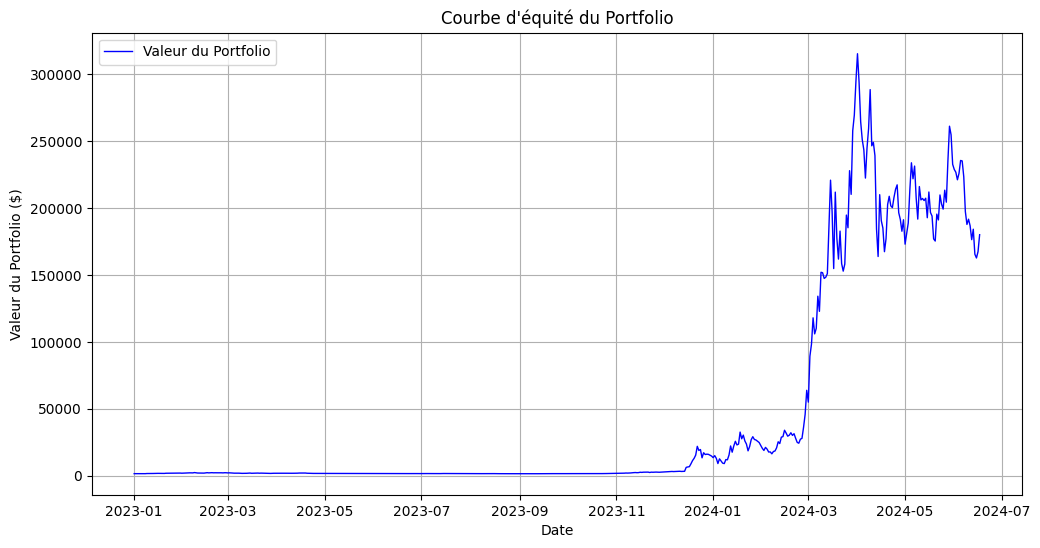

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assurez-vous que df_portfolio_history est créé après le backtest avec la meilleure configuration d'EMA
df_portfolio_history = pd.DataFrame(portfolio_history, columns=['Date', 'Portfolio Value'])
df_portfolio_history['Date'] = pd.to_datetime(df_portfolio_history['Date'])
df_portfolio_history.set_index('Date', inplace=True)

if not df_portfolio_history.empty:
    # Capital initial et final 
    initial_wallet = 1500
    final_wallet = df_portfolio_history['Portfolio Value'].iloc[-1]

    # Correction du calcul de la performance pour utiliser initial_wallet
    performance = (final_wallet - initial_wallet) / initial_wallet * 100

    # Calcul du Drawdown Maximal
    peak_values = df_portfolio_history['Portfolio Value'].cummax()
    drawdowns = (df_portfolio_history['Portfolio Value'] - peak_values) / peak_values
    worst_drawdown = drawdowns.min() * 100

    # Affichage des résultats
    
    print(f"Capital initial: {initial_wallet} $")
    print("--- Informations Générales ---")
    print(f"Début du backtest: {start_period}")
    print(f"Fin du backtest: {end_period}")
    print(f"Capital final: {final_wallet:.2f} $")
    print(f"Performance: {performance:.2f} %")
    print(f"Pire drawdown: {worst_drawdown:.2f} %")
    
    # Graphique
    plt.figure(figsize=(12, 6))
    plt.plot(df_portfolio_history.index, df_portfolio_history['Portfolio Value'], label='Valeur du Portfolio', color='blue', linewidth=1)
    plt.title('Courbe d\'équité du Portfolio')
    plt.xlabel('Date')
    plt.ylabel('Valeur du Portfolio ($)')
    ax = plt.gca()  # Obtient l'axe actuel
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Le DataFrame est vide. Assurez-vous que `portfolio_history` contient des données avant de continuer.")
